In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [2]:
data =  pd.read_csv('./Data/basetable.csv')

In [3]:
data.drop('Unnamed: 0', inplace = True, axis = 1)
data.head()

,client_id,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,...,age-group_80-90,age-group_90-100,campaign_missing,pdays_missing,previous_missing,emp.var.rate_missing,cons.price.idx_missing,cons.conf.idx_missing,euribor3m_missing,nr.employed_missing
0,29925,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,0,0,0,0,0,0,0
1,37529,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,...,0,0,0,0,0,0,0,0,0,0
2,2757,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,...,0,0,0,0,0,0,0,0,0,0
3,9642,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,...,0,0,0,0,0,0,0,0,0,0
4,14183,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   client_id                      20000 non-null  int64  
 1   campaign                       20000 non-null  float64
 2   pdays                          20000 non-null  float64
 3   previous                       20000 non-null  float64
 4   emp.var.rate                   20000 non-null  float64
 5   cons.price.idx                 20000 non-null  float64
 6   cons.conf.idx                  20000 non-null  float64
 7   euribor3m                      20000 non-null  float64
 8   nr.employed                    20000 non-null  float64
 9   subscribe                      20000 non-null  int64  
 10  job_admin.                     20000 non-null  int64  
 11  job_blue-collar                20000 non-null  int64  
 12  job_entrepreneur               20000 non-null 

In [5]:
y = data['subscribe']
X = data.drop('subscribe', axis = 1)
print(X.shape)
print(y.shape)

(20000, 83)
(20000,)


In [8]:
linear_svc = SVC(kernel='linear', probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)


In [9]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)

In [10]:
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
print(percentage)

0.11355


In [13]:
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1

In [14]:
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)

In [15]:
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"svm": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'svm': {'Acc_train': 0.6255714285714286, 'Acc_test': 0.6266666666666667}}

In [16]:
roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1])

0.5620590938206395

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


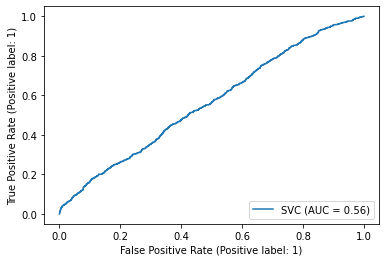

In [18]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(linear_svc, X_test, y_test)
plt.show()

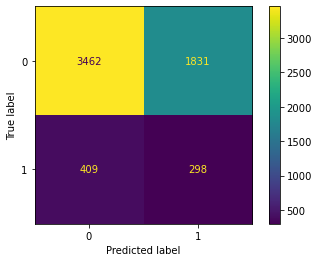

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

linear_svc = SVC(kernel='linear', probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X = X), y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [24]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8997857142857143, 'Acc_test': 0.8928333333333334}}

In [25]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.5523516208614705
0.5462016364385083


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


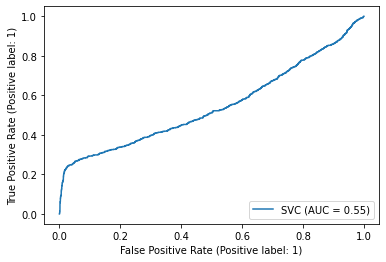

In [26]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(linear_svc, X_test, y_test)
plt.show()

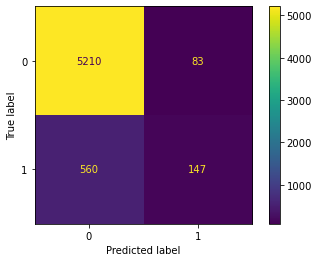

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [29]:
forward_selection_features = ['job_student', 'marital_single', 'default_no' ,  'contact_telephone', 'month_apr',  'month_dec',  'month_jun',  'month_mar' , 'month_oct' , 'month_sep', 'day_of_week_mon',  'poutcome_success',  'age-group_60-70' , 'age-group_70-80',  'age-group_80-90']

backward_selection_features = ['pdays', 'cons.conf.idx', 'nr.employed', 'job_blue-collar','contact_telephone', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success', 'pdays_missing', 'cons.conf.idx_missing', 'nr.employed_missing']

In [56]:
linear_svc = SVC(kernel='linear', probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [57]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8992857142857142, 'Acc_test': 0.8926666666666667}}

In [58]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.622119111744716
0.6003345402149727


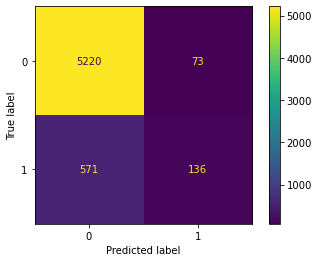

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [60]:
linear_svc = SVC(kernel='sigmoid', probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [61]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.5650714285714286, 'Acc_test': 0.5621666666666667}}

In [62]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.6143033662274118
0.6021841448942066


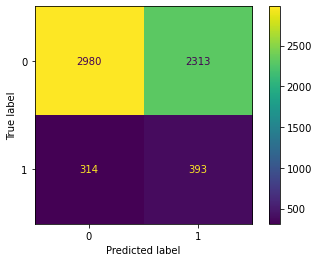

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [64]:
linear_svc = SVC(kernel='rbf', C = 0.1, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [65]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.9011428571428571, 'Acc_test': 0.8931666666666667}}

In [66]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.6484291901903475
0.652330704987586


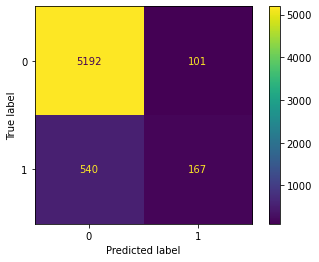

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [68]:
linear_svc = SVC(kernel='linear', C = 0.1, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [69]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8992857142857142, 'Acc_test': 0.8926666666666667}}

In [70]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.6362912639568813
0.6214669049966183


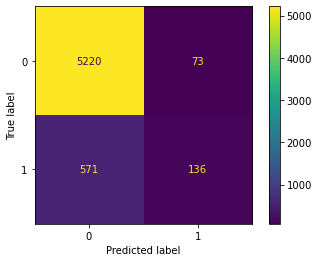

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [72]:
linear_svc = SVC(kernel='sigmoid', C = 0.1, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [73]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.5525714285714286, 'Acc_test': 0.5531666666666667}}

In [74]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.6157641446456497
0.6020294210468792


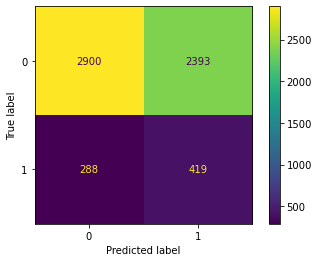

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [76]:
linear_svc = SVC(kernel='rbf', C = 0.01, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [77]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.9007857142857143, 'Acc_test': 0.8926666666666667}}

In [78]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.6465583326272458
0.649973771769231


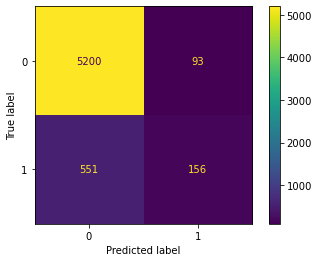

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [83]:
linear_svc = SVC(kernel='rbf', C = 1, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [86]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.9032857142857142, 'Acc_test': 0.8921666666666667}}

In [87]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.6446262665358142
0.6309039907796344


In [138]:
linear_svc = SVC(kernel='sigmoid', C = 0.01, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [139]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8938571428571429, 'Acc_test': 0.8911666666666667}}

In [140]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.5753293178207974
0.6247719560220846


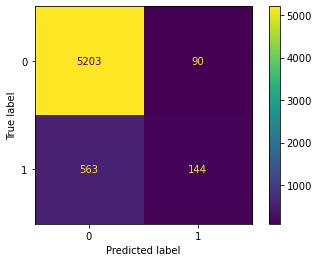

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [147]:
X_norm = pd.DataFrame()
for col in X.columns:
    X_norm[col] = X[col].map(lambda x: (x - np.mean(X[col]))/ np.std(X[col]))

In [161]:
linear_svc = SVC(kernel='sigmoid', C = 100, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [162]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.7283571428571428, 'Acc_test': 0.711}}

In [163]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.5216595413530062
0.46789800839143053


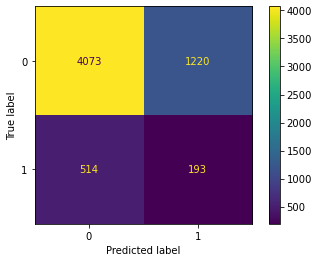

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [165]:
linear_svc = SVC(kernel='sigmoid', C = 0.01, probability=True)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X.loc[:, backward_selection_features]), y, test_size=0.3, random_state=42)

linear_svc.fit(X_train, y_train)

# predict probabilities
pred_train = linear_svc.predict_proba(X_train)
pred_test = linear_svc.predict_proba(X_test)

In [ ]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8800714285714286, 'Acc_test': 0.875}}

In [ ]:
print(roc_auc_score(y_train, linear_svc.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, linear_svc.predict_proba(X_test)[:, 1]))

0.5915535881308206
0.5940451093502107


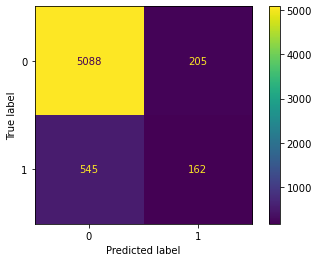

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()